In [1]:
from sklearn import linear_model
import pandas as pd
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


In [2]:
dataframe = pd.read_csv("/home/apprenant/simplon_project/League_of_Winner/data/dataclear.csv")
# add 2 new columns in the dataframe
dataframe['blue_kill'] = dataframe["kill_1"] + dataframe["kill_2"] + dataframe["kill_3"] + dataframe["kill_4"] + dataframe["kill_5"]
dataframe['red_kill'] = dataframe["kill_6"] + dataframe["kill_7"] + dataframe["kill_8"] + dataframe["kill_9"] + dataframe["kill_10"]

In [3]:
dataframe

,Unnamed: 0,match_ID,timeline,who_win,blue_kill_nashor,blue_kill_herald,blue_kill_fire_drake,blue_kill_air_drake,blue_kill_water_drake,blue_kill_earth_drake,...,assist_10,item1_10,item2_10,item3_10,item4_10,item5_10,item6_10,trinket_10,blue_kill,red_kill
0,0,5350461408,0,Red,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5350461408,1,Red,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,5350461408,2,Red,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,5350461408,3,Red,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5350461408,4,Red,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280161,29,5391933820,29,Blue,0,0,1,1,1,0,...,18,0,0,0,0,0,0,0,54,29
280162,30,5391933820,30,Blue,0,0,1,1,1,0,...,19,0,0,0,0,0,0,0,55,31
280163,31,5391933820,31,Blue,0,0,1,1,1,0,...,20,0,0,0,0,0,0,0,57,32
280164,32,5391933820,32,Blue,0,0,1,1,1,0,...,20,0,0,0,0,0,0,0,60,32


In [6]:
df_train = dataframe.iloc[0:168089,:]
df_train

,Unnamed: 0,match_ID,timeline,who_win,blue_kill_nashor,blue_kill_herald,blue_kill_fire_drake,blue_kill_air_drake,blue_kill_water_drake,blue_kill_earth_drake,...,item1_10,item2_10,item3_10,item4_10,item5_10,item6_10,trinket_10,blue_kill,red_kill,assist_red
0,0,5350461408,0,Red,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5350461408,1,Red,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,5350461408,2,Red,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,5350461408,3,Red,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5350461408,4,Red,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168084,34,5394068333,34,Blue,0,0,0,1,1,0,...,0,0,0,0,0,0,0,79,72,71
168085,35,5394068333,35,Blue,0,0,0,1,1,0,...,0,0,0,0,0,0,0,80,73,71
168086,36,5394068333,36,Blue,0,0,0,1,1,0,...,0,0,0,0,0,0,0,82,76,74
168087,37,5394068333,37,Blue,0,0,0,1,1,0,...,0,0,0,0,0,0,0,84,79,78


In [7]:
df_valid = dataframe.iloc[168089:224119,:]
df_valid

,Unnamed: 0,match_ID,timeline,who_win,blue_kill_nashor,blue_kill_herald,blue_kill_fire_drake,blue_kill_air_drake,blue_kill_water_drake,blue_kill_earth_drake,...,item1_10,item2_10,item3_10,item4_10,item5_10,item6_10,trinket_10,blue_kill,red_kill,assist_red
168089,0,5383624391,0,Blue,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168090,1,5383624391,1,Blue,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168091,2,5383624391,2,Blue,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168092,3,5383624391,3,Blue,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
168093,4,5383624391,4,Blue,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224114,20,5384221753,20,Red,0,0,0,0,0,1,...,0,0,0,0,0,0,0,24,66,85
224115,21,5384221753,21,Red,0,0,0,0,0,1,...,0,0,0,0,0,0,0,29,73,97
224116,22,5384221753,22,Red,0,0,0,0,0,1,...,0,0,0,0,0,0,0,33,79,103
224117,23,5384221753,23,Red,0,0,0,0,0,1,...,0,0,0,0,0,0,0,35,82,104


In [8]:
df_test = dataframe.iloc[224119:280166,:]
df_test

,Unnamed: 0,match_ID,timeline,who_win,blue_kill_nashor,blue_kill_herald,blue_kill_fire_drake,blue_kill_air_drake,blue_kill_water_drake,blue_kill_earth_drake,...,item1_10,item2_10,item3_10,item4_10,item5_10,item6_10,trinket_10,blue_kill,red_kill,assist_red
224119,0,5347840699,0,Red,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
224120,1,5347840699,1,Red,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
224121,2,5347840699,2,Red,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,6
224122,3,5347840699,3,Red,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,8
224123,4,5347840699,4,Red,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280161,29,5391933820,29,Blue,0,0,1,1,1,0,...,0,0,0,0,0,0,0,54,29,55
280162,30,5391933820,30,Blue,0,0,1,1,1,0,...,0,0,0,0,0,0,0,55,31,59
280163,31,5391933820,31,Blue,0,0,1,1,1,0,...,0,0,0,0,0,0,0,57,32,61
280164,32,5391933820,32,Blue,0,0,1,1,1,0,...,0,0,0,0,0,0,0,60,32,61


## Regression Linéaire simple 

In [9]:
list_of_variable = ['timeline', 'blue_destr_tower', 'red_destr_tower', 'blue_gold', 'red_gold', 'kill_1', 'death_1', 'assist_1', 'kill_2', 'death_2', 'assist_2', 'kill_3', 'death_3', 'assist_3', 'kill_4', 'death_4', 'assist_4', 'kill_5', 'death_5', 'assist_5',
'kill_6', 'death_6', 'assist_6', 'kill_7', 'death_7', 'assist_7', 'kill_8', 'death_8', 'assist_8', 'kill_9', 'death_9', 'assist_9', 'kill_10', 'death_10', 'assist_10']
X_train = df_train[list_of_variable]
X_test = df_test[list_of_variable]
X_valid = df_valid[list_of_variable]
y_valid = df_valid['who_win']
y_train = df_train['who_win']
y_test = df_test['who_win']

In [10]:
X_train

,timeline,blue_destr_tower,red_destr_tower,blue_gold,red_gold,kill_1,death_1,assist_1,kill_2,death_2,...,assist_7,kill_8,death_8,assist_8,kill_9,death_9,assist_9,kill_10,death_10,assist_10
0,0,0,0,2500,2500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,2510,2500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,2981,2910,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,4805,4887,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,8151,8354,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168084,34,6,5,108151,108412,5,16,12,23,14,...,7,4,22,34,10,18,4,18,16,8
168085,35,7,5,112491,110537,5,16,12,23,15,...,7,4,22,34,10,18,4,18,16,8
168086,36,7,6,115073,114048,5,16,13,23,16,...,7,4,23,36,10,18,5,19,16,8
168087,37,7,7,116990,119939,6,17,14,23,16,...,8,4,24,38,10,19,6,20,16,8


In [51]:
y_train

,Blue,Red
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
168084,1,0
168085,1,0
168086,1,0
168087,1,0


In [11]:
X_valid

,timeline,blue_destr_tower,red_destr_tower,blue_gold,red_gold,kill_1,death_1,assist_1,kill_2,death_2,...,assist_7,kill_8,death_8,assist_8,kill_9,death_9,assist_9,kill_10,death_10,assist_10
168089,0,0,0,2500,2500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168090,1,0,0,2500,2500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168091,2,0,0,3012,2889,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168092,3,0,0,5547,4660,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168093,4,0,0,8246,7958,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224114,20,1,5,59890,76048,6,21,4,0,10,...,11,6,5,20,18,6,8,4,2,33
224115,21,1,6,62948,82764,6,23,6,1,12,...,14,7,6,22,21,7,10,4,3,36
224116,22,1,8,66084,85433,6,25,7,2,13,...,15,9,6,24,22,8,11,4,4,37
224117,23,1,8,71282,89183,6,26,7,2,13,...,15,11,7,25,22,8,11,4,4,37


In [12]:
X_test

,timeline,blue_destr_tower,red_destr_tower,blue_gold,red_gold,kill_1,death_1,assist_1,kill_2,death_2,...,assist_7,kill_8,death_8,assist_8,kill_9,death_9,assist_9,kill_10,death_10,assist_10
224119,0,0,0,2500,2500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
224120,1,0,0,2520,3274,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
224121,2,0,0,2914,3926,0,0,0,0,0,...,2,0,0,2,0,0,2,0,0,0
224122,3,0,0,4737,6818,0,0,0,0,1,...,4,0,0,2,0,0,2,0,0,0
224123,4,0,0,7931,10016,0,0,0,0,2,...,5,0,0,2,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280161,29,6,2,93659,76748,4,8,19,20,4,...,8,4,10,19,4,16,2,2,8,18
280162,30,6,3,96814,77463,4,8,19,20,4,...,8,4,10,21,4,17,2,2,8,19
280163,31,6,3,101649,79333,4,8,19,21,4,...,8,4,10,22,4,18,2,2,8,20
280164,32,6,3,104989,82573,5,8,20,22,4,...,8,4,11,22,4,18,2,2,8,20


In [13]:
y_train = pd.get_dummies(y_train)
y_valid = pd.get_dummies(y_valid)
y_test = pd.get_dummies(y_test)

In [14]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = reg.predict(X_test)
y_pred

array([[ 0.50770787,  0.49229213],
       [ 0.48160387,  0.51839613],
       [ 0.45788332,  0.54211668],
       ...,
       [ 1.09349459, -0.09349459],
       [ 1.13575102, -0.13575102],
       [ 1.27120371, -0.27120371]])

In [16]:
joblib.dump(reg, '/home/apprenant/simplon_project/League_of_Winner/notebook/regression_lineaire_simple' )

['/home/apprenant/simplon_project/League_of_Winner/notebook/regression_lineaire_simple']

In [17]:
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

In [18]:
y_test['Blue'].values

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [19]:
accuracy_score(y_test['Blue'].values, y_pred)

0.7141149392474173

## Regression Lineaire avec Ridge

In [20]:
reg = linear_model.Ridge()
reg.fit(X_train, y_train)

Ridge()

In [53]:
y_pred1 = reg.predict(X_valid)
y_pred1

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [54]:
y_pred11 = reg.predict(X_test)
y_pred11

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [22]:
joblib.dump(reg, '/home/apprenant/simplon_project/League_of_Winner/notebook/regression_lineaire_ridge' )

['/home/apprenant/simplon_project/League_of_Winner/notebook/regression_lineaire_ridge']

In [23]:
y_pred1 = [1 if x[0] > 0.5 else 0 for x in y_pred1]

In [24]:
y_test['Blue'].values

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [25]:
accuracy_score(y_test['Blue'].values, y_pred1)

0.7141149392474173

## Régression Linéaire avec Lasso

In [26]:
reg = linear_model.Lasso(alpha = 1 )
reg.fit(X_train, y_train)

Lasso(alpha=1)

In [27]:
y_pred2 = reg.predict(X_test)

In [28]:
y_pred2

array([[ 0.4981235 ,  0.5018765 ],
       [ 0.48314006,  0.51685994],
       [ 0.47800792,  0.52199208],
       ...,
       [ 0.94025173,  0.05974827],
       [ 0.94219422,  0.05780578],
       [ 1.0425603 , -0.0425603 ]])

In [29]:
joblib.dump(reg, '/home/apprenant/simplon_project/League_of_Winner/notebook/regression_lineaire_lasso' )

['/home/apprenant/simplon_project/League_of_Winner/notebook/regression_lineaire_lasso']

In [30]:
y_pred2 = [1 if x[0] > 0.5 else 0 for x in y_pred2]

In [31]:
y_test['Blue'].values

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [32]:
accuracy_score(y_test['Blue'].values, y_pred2)

0.6722393705283066

## Régression logistique

In [52]:
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train['Blue'])

LogisticRegression()

In [34]:
y_pred3 = reg.predict(X_test)
y_pred3

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [35]:
accuracy_score(y_test['Blue'].values, y_pred3)

0.6727924777418952

In [36]:
joblib.dump(reg, '/home/apprenant/simplon_project/League_of_Winner/notebook/regression_logistique')

['/home/apprenant/simplon_project/League_of_Winner/notebook/regression_logistique']

## modèle avec XGBoost

In [37]:
X_train = df_train[list_of_variable]
X_test = df_test[list_of_variable]
y = df_train['who_win']


In [38]:
boost = XGBClassifier()
boost.fit(X_train, y)
p_boost = boost.predict(X_train)
print ("précision -->", round(boost.score(X_train, y) *100,2), "%")

/home/apprenant/simplon_project/League_of_Winner/env/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
précision --> 78.75 %


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

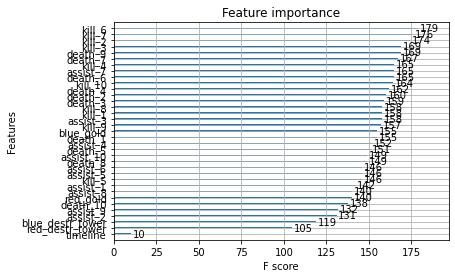

In [39]:
xgb.plot_importance(boost)

In [40]:
# save the model
boost._Booster.save_model('lop.xbmodel')

# read the model
boost = xgb.Booster({'nthread': 4})
boost.load_model('lop.xbmodel')

In [49]:
X_train = df_train[list_of_variable]
X_test = df_test[list_of_variable]
y = df_train['who_win']
y = pd.get_dummies(y)

## XGBoost Regressor

In [50]:
boost1 = XGBRegressor()
boost1.fit(X_train, y)

AssertionError: 